In [48]:
import yfinance as yf
from pandas import DataFrame as df
from pandas_datareader import data as pdr
import pandas as pd

msft = yf.Ticker("MSFT")

msft_ohlc_df = msft.history(period="max", interval='1d', start='2019-10-02', end='2020-01-01')
msft_ohlc_df.index = pd.to_datetime(msft_ohlc_df.index, format='%Y-%M-%d')
msft_ohlc_df['Open']
# msft.info

Date
2019-10-02    135.04
2019-10-03    133.75
2019-10-04    135.54
2019-10-07    135.92
2019-10-08    135.86
               ...  
2019-12-24    156.61
2019-12-26    156.69
2019-12-27    158.57
2019-12-30    158.12
2019-12-31    155.91
Name: Open, Length: 63, dtype: float64

In [49]:
from stockstats import StockDataFrame as sdf

df_copy = msft_ohlc_df
stock = sdf.retype(df_copy)

/home/michael/Share/environments/finance_app_env/lib/python3.6/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


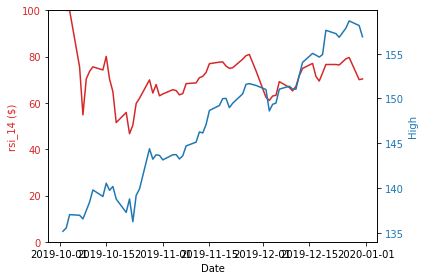

In [50]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('rsi_14 ($)', color=color)
ax1.plot(stock.index, stock['rsi_14'], color=color)
ax1.tick_params(axis='y', labelcolor=color)
plt.ylim(0,100)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('High', color=color)  # we already handled the x-label with ax1
ax2.plot(stock.index, stock['high'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

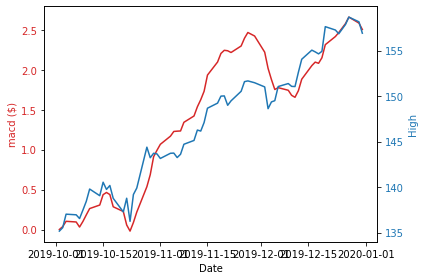

In [52]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('macd ($)', color=color)
ax1.plot(stock.index, stock['macd'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('High', color=color)  # we already handled the x-label with ax1
ax2.plot(stock.index, stock['high'], color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()